In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def plot_speedup(serial_times, parallel_times, array_sizes, name):
    speedup_data = []
    for i in range(len(array_sizes)):
        speedup = [serial_times[i] / parallel for parallel in parallel_times[i]]
        speedup_data.append(speedup)

    num_threads = np.array([1, 2, 4, 8, 16, 20])

    optimal_speedup = num_threads[:len(parallel_times[0])]

    plt.figure(figsize=(10, 6))
    for i, array_size in enumerate(array_sizes):
        plt.plot(num_threads[:len(parallel_times[i])], speedup_data[i], marker='o', label=f"N = {array_size}")

    plt.plot(num_threads[:len(optimal_speedup)], optimal_speedup, linestyle='--', color='red', label='Optimal Speedup')

    plt.title(f"Speedup vs Number of Threads ({name})")
    plt.xlabel("Number of Threads")
    plt.ylabel("Speedup")
    plt.grid(True)
    plt.yscale("log")
    plt.xscale("log")
    plt.legend()
    plt.xticks(num_threads, labels=[str(t) for t in num_threads])

    plt.savefig("speedup_plot.png")

    plt.show()

In [10]:
def plot_timing(serial_times, parallel_times, array_sizes, name):
    num_threads = np.array([1, 2, 4, 8, 16, 20])

    plt.figure(figsize=(10, 6))

    for i, array_size in enumerate(array_sizes):
        plt.plot(num_threads[:len(parallel_times[i])], parallel_times[i], marker='o', label=f"N = {array_size}")

    plt.title(f"Execution Time vs Number of Threads ({name})")
    plt.xlabel("Number of Threads")
    plt.ylabel("Execution Time")
    plt.grid(True)
    plt.legend()
    plt.yscale("log")
    plt.xticks(num_threads)

    plt.savefig(f"timing_plot_{name}.png")

    plt.show()

In [11]:
def plot_scaling(serial_times, parallel_times, array_sizes, name):
    num_threads = np.array([1, 2, 4, 8, 16, 20])

    plt.figure(figsize=(10, 6))

    for i, array_size in enumerate(array_sizes):
        execution_time_per_thread = np.array(parallel_times[i]) / num_threads[:len(parallel_times[i])]
        plt.plot(num_threads[:len(parallel_times[i])], execution_time_per_thread, marker='o', label=f"N = {array_size}")

    plt.title(f"Execution Time vs Number of Threads ({name})")
    plt.xlabel("Number of Threads")
    plt.ylabel("Execution Time per Thread (sec)")
    plt.grid(True)
    plt.yscale("log")
    plt.legend()
    plt.xticks(num_threads, labels=[str(t) for t in num_threads])

    plt.savefig(f"scaling_plot_{name}.png", dpi=400)

    plt.show()

In [12]:
def plot_efficiency(serial_times, parallel_times, array_sizes, name):

    num_threads = np.array([1, 2, 4, 8, 16, 20])

    efficiency_data = []
    for i in range(len(array_sizes)):
        efficiency = [serial_times[i] / (parallel * threads) for parallel, threads in zip(parallel_times[i], num_threads)]
        efficiency_data.append(efficiency)

    plt.figure(figsize=(10, 6))

    for i, array_size in enumerate(array_sizes):
        plt.plot(num_threads[:len(parallel_times[i])], efficiency_data[i], marker='o', label=f"N = {array_size}")

    plt.axhline(y=1, color='red', linestyle='--', label='Optimal Efficiency')
    plt.title(f"Efficiency vs Number of Threads ({name})")
    plt.xlabel("Number of Threads")
    plt.ylabel("Efficiency")
    plt.ylim(0, 1.1)
    plt.grid(True)
    plt.xscale("log")
    plt.xticks(num_threads, labels=[str(t) for t in num_threads])
    plt.legend()

    plt.savefig(f"efficiency_plot_{name}.png")

    plt.show()

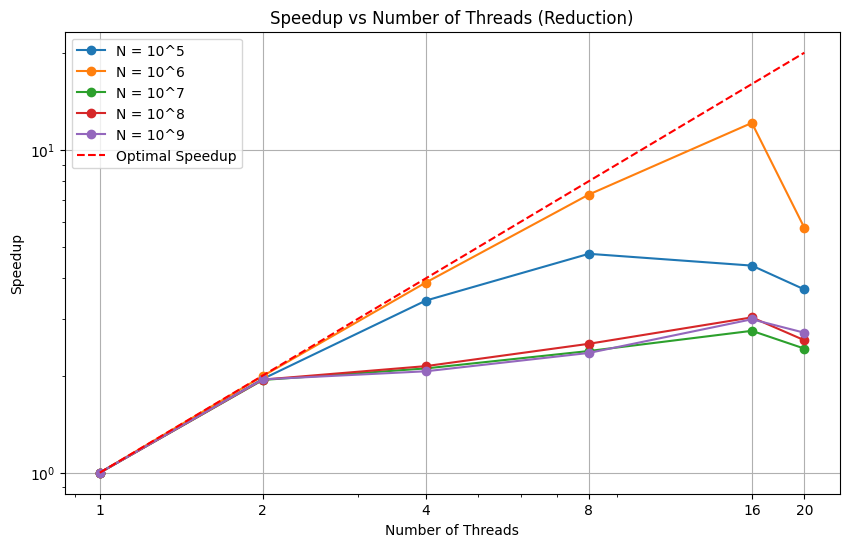

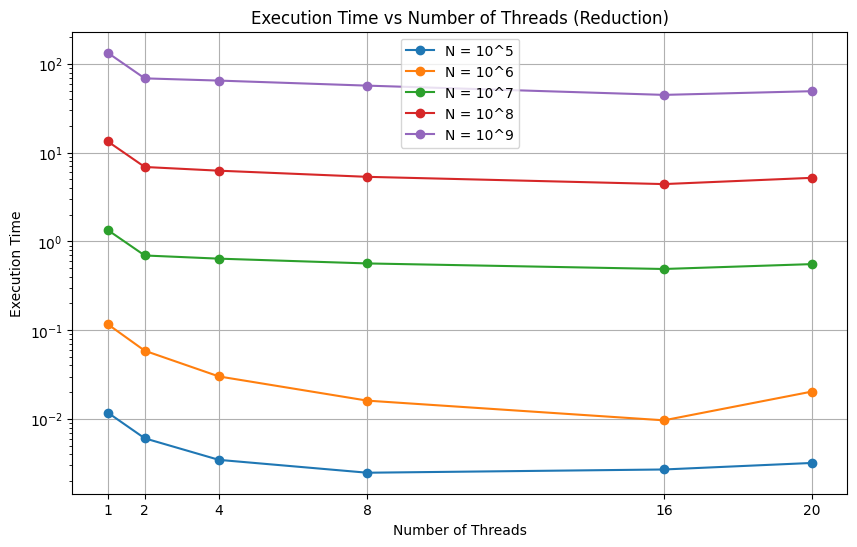

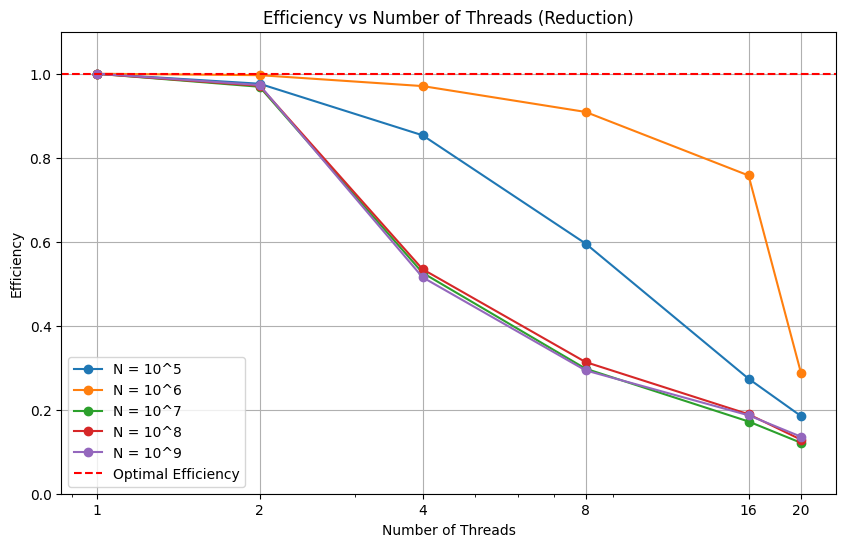

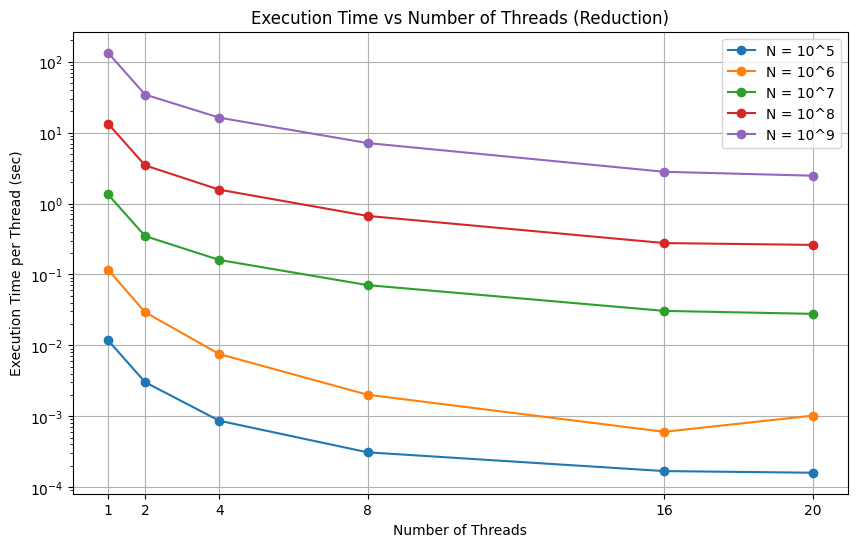

In [13]:
serial_times = [0.0117952, 0.116864, 1.34626, 13.4116, 133.943]  # Serial execution
parallel_times_reduction = [
    [0.0117952, 0.00604165, 0.00345508, 0.00247517, 0.00269236, 0.00319103],  # N=10^5
    [0.116864, 0.0586332, 0.0301012, 0.01607, 0.00963946, 0.0203617],      # N=10^6
    [1.34626, 0.694687, 0.639863, 0.565161, 0.489328, 0.555484],           # N=10^7
    [13.4137, 6.90442, 6.27104, 5.34744, 4.42949, 5.21305],                # N=10^8
    [133.901, 68.8276, 64.9755, 57.0081, 44.8376, 49.3542]                 # N=10^9
]

array_sizes = ['10^5', '10^6', '10^7', '10^8', '10^9']

plot_speedup(serial_times, parallel_times_reduction, array_sizes, "Reduction")
plot_timing(serial_times, parallel_times_reduction, array_sizes, "Reduction")
plot_efficiency(serial_times, parallel_times_reduction, array_sizes, "Reduction")
plot_scaling(serial_times, parallel_times_reduction, array_sizes, "Reduction")

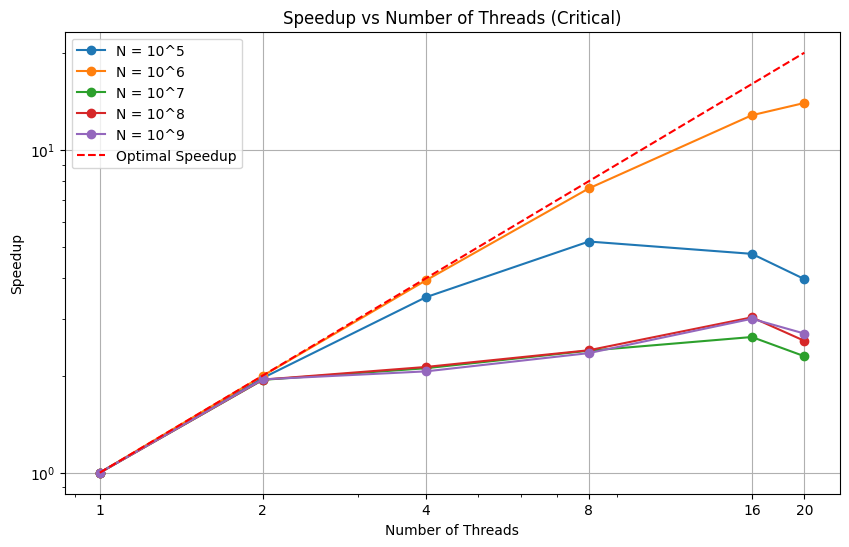

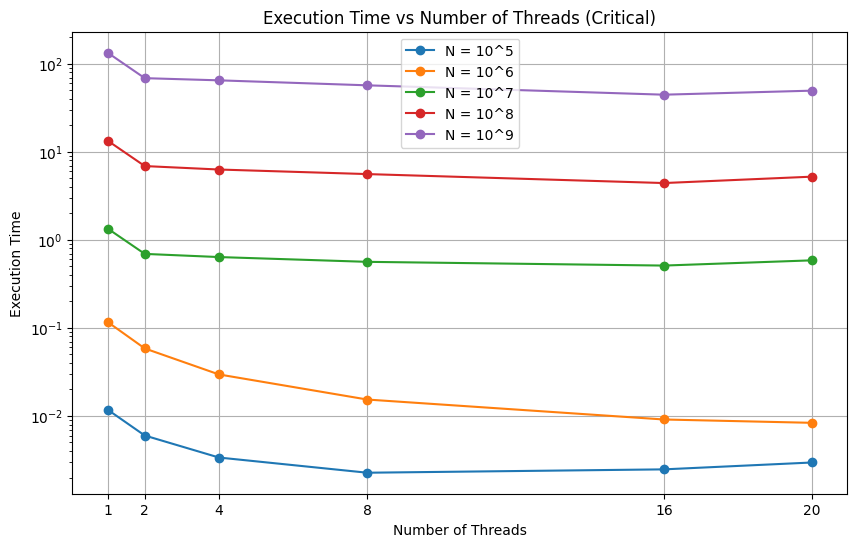

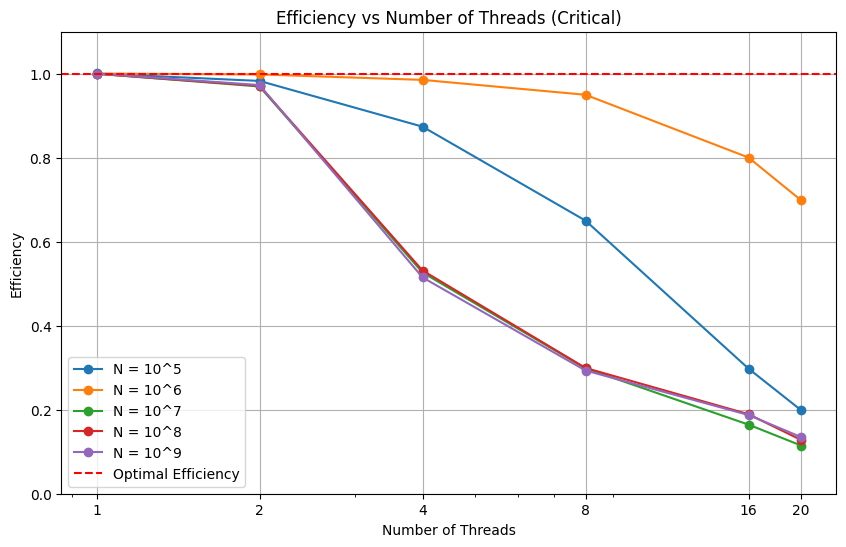

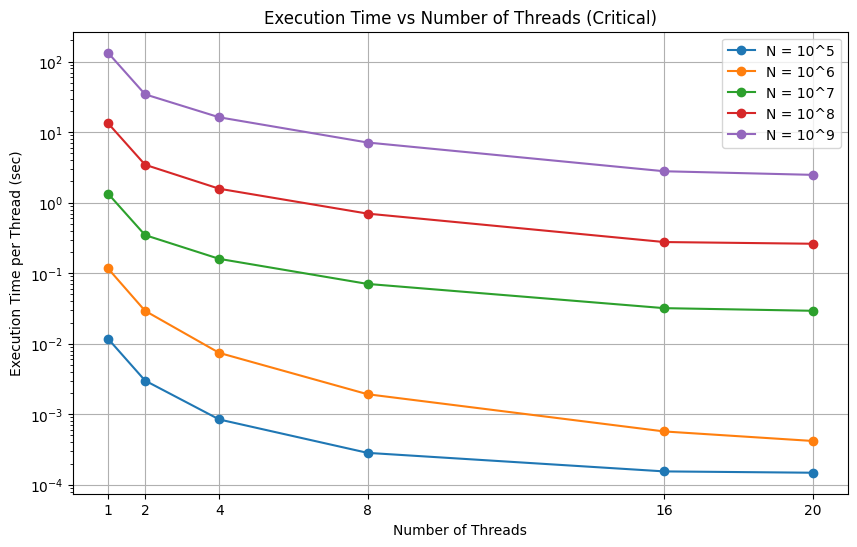

In [14]:
parallel_times_critical = [
    [0.0117889, 0.00600061, 0.00337408, 0.00226766, 0.00247585, 0.00296413],  # N=10^5
    [0.116821, 0.0585317, 0.0296502, 0.0153791, 0.00912585, 0.00836276],    # N=10^6
    [1.34629, 0.694209, 0.63902, 0.563883, 0.511446, 0.586565],             # N=10^7
    [13.4136, 6.90517, 6.30877, 5.59942, 4.42826, 5.23531],                 # N=10^8
    [133.894, 68.83, 65.0187, 57.0748, 44.6718, 49.6471]                    # N=10^9
]
plot_speedup(serial_times, parallel_times_critical, array_sizes, "Critical")
plot_timing(serial_times, parallel_times_critical, array_sizes, "Critical")
plot_efficiency(serial_times, parallel_times_critical, array_sizes, "Critical")
plot_scaling(serial_times, parallel_times_critical, array_sizes, "Critical")


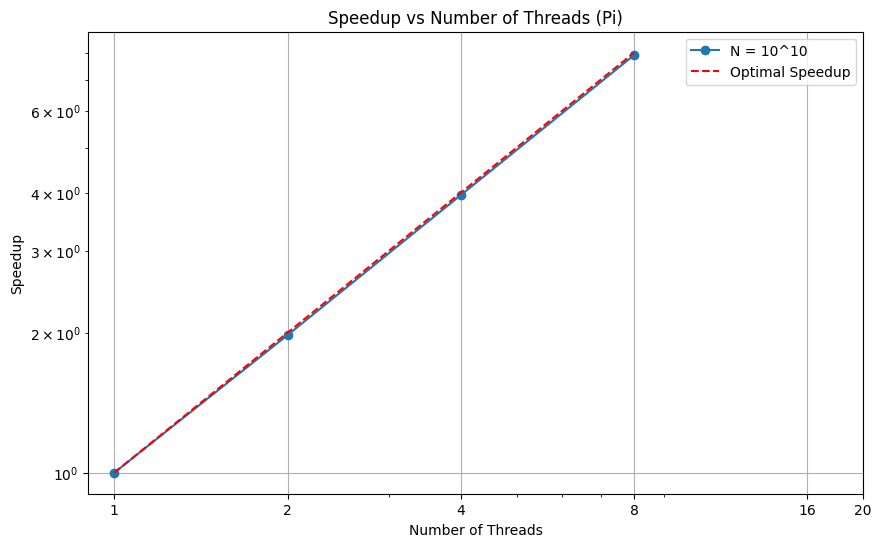

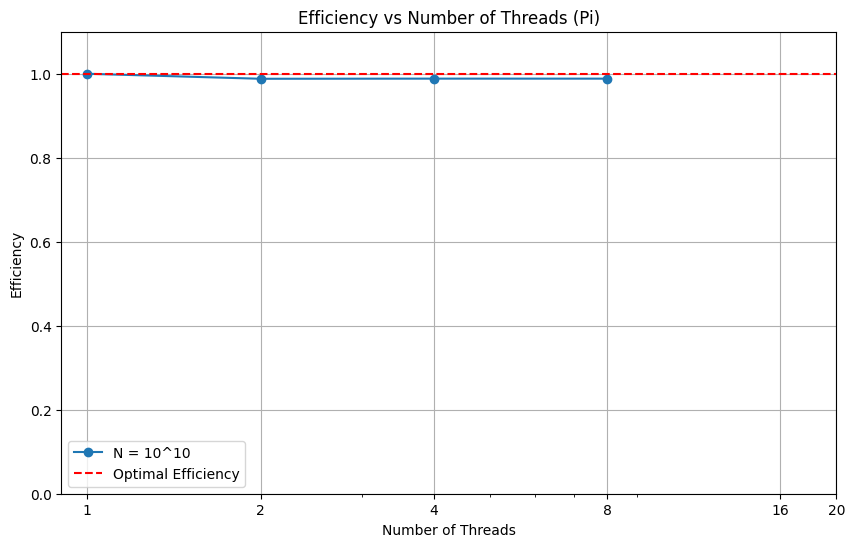

In [15]:
time_parallel_pi = [[
    53.39809,
    27.0221,
    13.50651,
    6.753525,
    ]
]
time_serial_pi = [53.393851]
plot_speedup(time_serial_pi, time_parallel_pi , ["10^10"], "Pi")
plot_efficiency(time_serial_pi, time_parallel_pi , ["10^10"], "Pi")


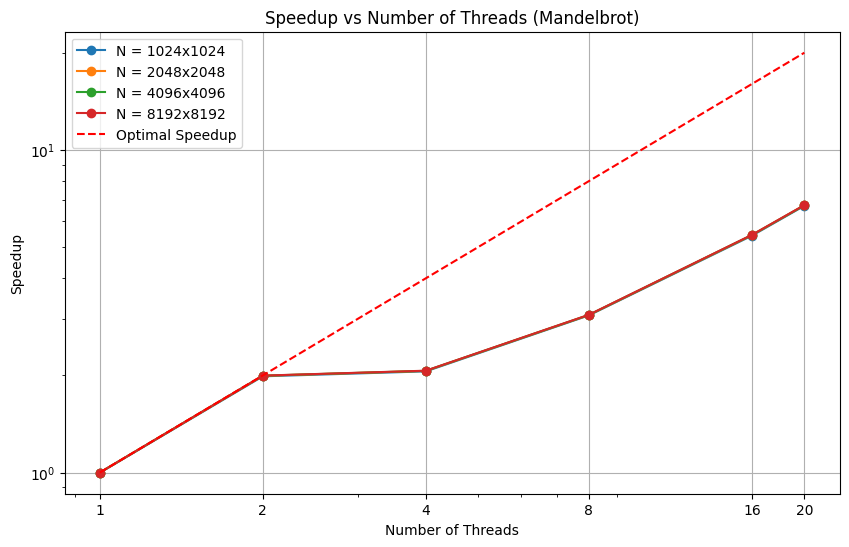

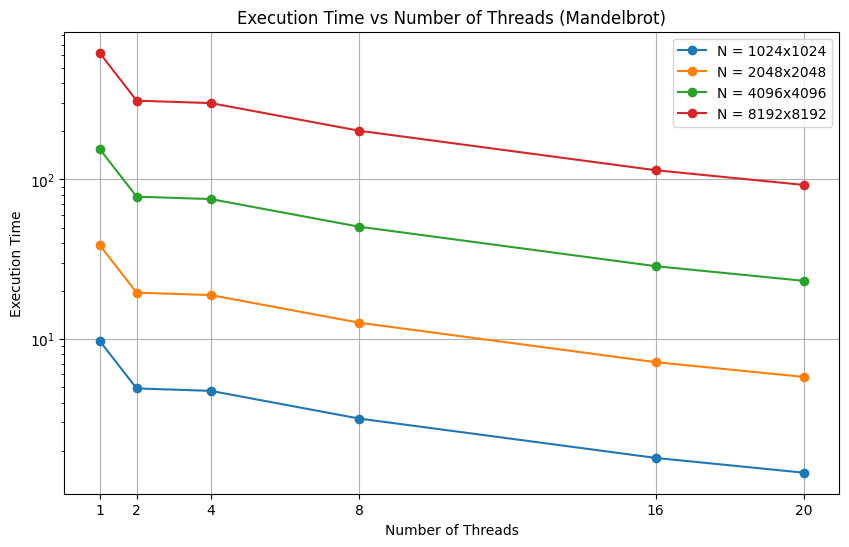

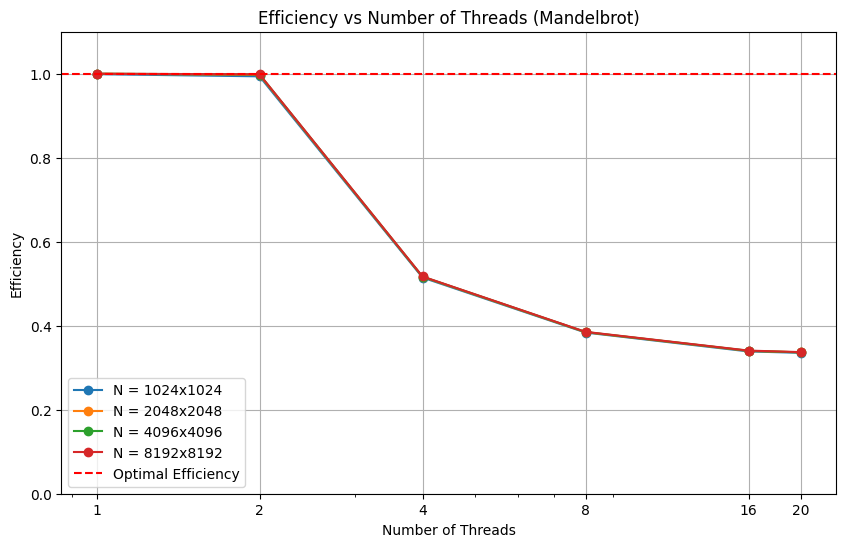

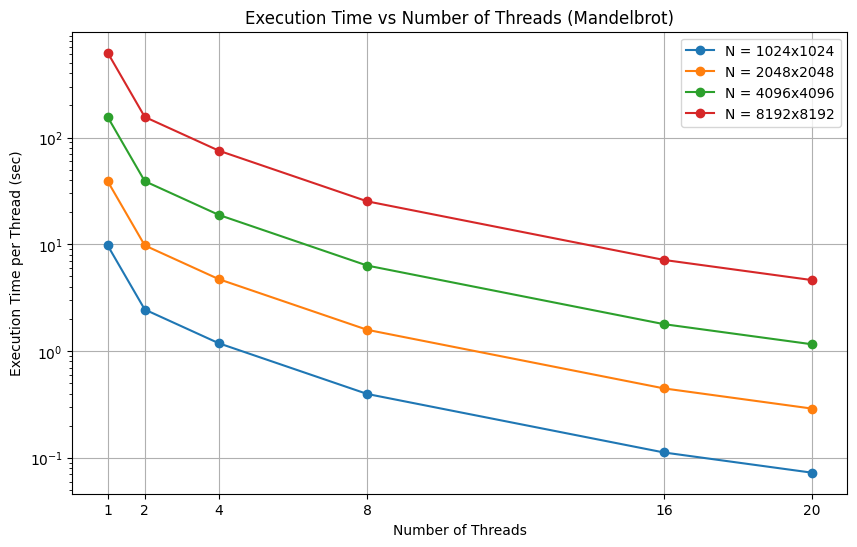

In [16]:
parallel_times_mandelbrot_multi_threaded = [
    [9.75152, 4.90121, 4.73148, 3.17306, 1.79735, 1.45183],
    [38.9478, 19.5285, 18.854, 12.6577, 7.15889, 5.78402],
    [155.782, 78.0365, 75.3708, 50.5879, 28.6086, 23.1507],
    [623.122, 311.988, 301.2, 202.107, 114.29, 92.4126]
]

parallel_times_mandelbrot_single_threaded = [
    9.74152,
    38.9478,
    155.782,
    623.122
]

image_sizes = [
    "1024x1024",
    "2048x2048",
    "4096x4096",
    "8192x8192"
]

plot_speedup(parallel_times_mandelbrot_single_threaded, parallel_times_mandelbrot_multi_threaded, image_sizes, "Mandelbrot")
plot_timing(parallel_times_mandelbrot_single_threaded, parallel_times_mandelbrot_multi_threaded, image_sizes, "Mandelbrot")
plot_efficiency(parallel_times_mandelbrot_single_threaded, parallel_times_mandelbrot_multi_threaded, image_sizes, "Mandelbrot")
plot_scaling(parallel_times_mandelbrot_single_threaded, parallel_times_mandelbrot_multi_threaded, image_sizes, "Mandelbrot")